In [1113]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns

import us
from datetime import datetime, timezone

pd.set_option('display.max_columns', 999)

In [1114]:
#data_path = "C:/Users/armcl/Python/Springboard_Cap2/Data/" #Home
data_path = "C:/Users/yyzhao/python/Springboard/Capstone2/Data/" #Work

In [1115]:
#Read customers data
customers = pd.read_csv(data_path + "Subscription/customers.csv", encoding="utf8")

customers = customers.drop(columns = ['note','ship_street','ship_unit','location',
                                     'wrr','last4','source','customer_metadata',
                                     'ship_phone_number'])

#revenue and mrr need to be divided by 100
customers[['total_revenue','mrr']] = customers[['total_revenue','mrr']]/100

#some observations are missing location data, # of orders, and might have wrong name
#will investigate once merged with other data


In [1116]:
#mrr: monthly recurring revenue
#mixed subscription status: once subscribed, cancelled, subscribed again
customers.head(2)

,customer_id,first_name,last_name,american,name,email,ship_to,ship_city,ship_state,ship_zip_code,ship_country,country,total_revenue,mrr,num_orders,num_subscriptions,subscription_status,payment_provider,marketplace_source
0,2739202452,Jennifer,Ting,0,Jennifer Ting,muchenting@hotmail.com,Jennifer Ting,San Ramon,CA,94583,US,US,275.0,23.75,1,1,active,STRIPE,False
1,2729781565,Caelyn,Furman,1,Caelyn Furman,caelyn.furman@gmail.com,Caelyn Furman,Avondale Esates,GA,30002,US,US,185.9,0.00,2,0,none,STRIPE,False


In [1117]:
customers.shape

(1320, 19)

In [1118]:
customers.describe()

,customer_id,american,total_revenue,mrr,num_orders,num_subscriptions
count,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2.053670e+09,0.053030,129.265508,6.450795,3.173485,1.017424
std,3.030278e+08,0.224179,172.433666,11.453050,3.426392,0.555215
min,7.880641e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.864414e+09,0.000000,17.960000,0.000000,1.000000,1.000000
50%,1.937069e+09,0.000000,52.875000,0.000000,2.000000,1.000000
75%,2.279912e+09,0.000000,197.770000,20.900000,4.000000,1.000000
max,2.739202e+09,1.000000,1468.920000,95.000000,22.000000,5.000000


In [1119]:
##More avg revenue from American families need to focus more on this market
#Analyze state
family_analysis = pd.DataFrame({'count' : customers.groupby( [ 'american'] ).size()})
family_analysis['avg_revenue']=customers.groupby('american').mean()['total_revenue']
family_analysis['total_revenue']= family_analysis['count']*family_analysis['avg_revenue']
family_analysis.sort_values('total_revenue', ascending=False)

,count,avg_revenue,total_revenue
american,,,
0,1250,126.351360,157939.20
1,70,181.303857,12691.27


In [1120]:
#add median
customers.groupby('american').median()['total_revenue']

american
0    51.860
1    80.925
Name: total_revenue, dtype: float64

In [1121]:
#Analyze state
#Texas shows one of the highest revenue in mean and median
state_analysis = pd.DataFrame({'count' : customers.groupby( [ 'ship_state'] ).size()})
state_analysis['avg_revenue']=customers.groupby('ship_state').mean()['total_revenue']
state_analysis['median_revenue']=customers.groupby('ship_state').median()['total_revenue']

state_analysis['total_revenue']= state_analysis['count']*state_analysis['avg_revenue']
state_analysis.sort_values('total_revenue', ascending=False)

,count,avg_revenue,median_revenue,total_revenue
ship_state,,,,
CA,503,114.867256,46.250,57778.23
WA,121,137.580826,64.900,16647.28
TX,82,180.316951,78.300,14785.99
NY,95,129.835158,57.120,12334.34
NJ,54,149.992963,60.375,8099.62
OH,34,201.547647,76.330,6852.62
PA,45,145.669111,84.850,6555.11
MA,39,161.445385,92.700,6296.37
MD,41,139.972195,19.950,5738.86


In [1122]:
#More revenue from American families need to focus more on this market
customers.groupby('american').mean()

,customer_id,total_revenue,mrr,num_orders,num_subscriptions,marketplace_source
american,,,,,,
0,2.056710e+09,126.351360,6.374573,3.1664,1.016800,0.002400
1,1.999398e+09,181.303857,7.811905,3.3000,1.028571,0.042857


In [1123]:
payment_count = customers.groupby('payment_provider').size()

payment_count/payment_count.sum()

payment_provider
PAYPAL    0.307692
STRIPE    0.692308
dtype: float64

In [1124]:
#sub_status = customers.groupby('subscription_status').size()

#sub_status/sub_status.sum()

In [1125]:
#Median Revenue by Subscription Status
#Mixed shows the highest total revenue and num of orders, there are many reasons:
#1) clients subscribed, cancelled(didn't like at first, on vacation), came back and subscribed again
#2) accidentally ordered more than needed and cancelled
#3) clients ordered gifts for friends and cancelled/expired later
#4) currently cancelled and there were expired gifts
#5) clients tried several ages first and decided to keep one that fits child's age

#It's hard to interpret with all these different factors
#Need to combine with subscription and cancellation reason data for better information
#For example: cancelled+active vs. cancelled+expired
#customers.groupby('subscription_status').mean()

In [1126]:
#Subscription Data

#Use email to merge
#Fullfillment status == 'cancelled': this probably means 
#1)when total_revenue = 0: accidental orders
#2)when total_revenue is not 0 and refunded mad customers

#Date, need to convert to local time for timing analysis, default is PDT
#Questions like1) what time do peoplel like to subscribe/cancel 2)when do they like to open emails and take actions

subscriptions = pd.read_csv(data_path + "Subscription/subscriptions.csv", encoding="utf8")

#Drop columns with all NAs
subscriptions = subscriptions.dropna(axis=1, how='all')

#revenue to numeric
subscriptions['Total Revenue'] = subscriptions['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)

#subscriptions.head(2)

In [1127]:
#Merge several columns

subscriptions['Subscription_Product'] = subscriptions[['Subscription Product 1','Subscription Product 2','Subscription Product 3',
               'Subscription Product 4','Subscription Product 5']].apply(lambda x: x.str.cat(sep=''), axis=1)

#Product name changed but essentially the same
subscriptions['Subscription_Product'] = subscriptions['Subscription_Product'].replace({'0-2岁熊猫金袋':'0-2 box',
                                                                                     '0-2岁熊猫盒子':'0-2 box',
                                                                                       '2-5岁熊猫金袋':'2-5 box',
                                                                                     '2-5岁熊猫盒子':'2-5 box',
                                                                                       '5岁+熊猫金袋':'5+ box',
                                                                                     '5岁+熊猫盒子':'5+ box'})

subscriptions['Child_Age'] = subscriptions[[' Subscription Product 1 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 2 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 3 Survey Field: 宝宝现在几岁了？* ',
               ' Subscription Product 4 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 5 Survey Field: 宝宝现在几岁了？* ']].apply(lambda x: x.dropna().astype(str).str.cat(sep=''), axis=1)

subscriptions['Child_Age'] = pd.to_numeric(subscriptions['Child_Age'], errors='coerce')

#age 0 is showing as NA, change them to 0 again
subscriptions['Child_Age'].fillna(0, inplace=True)

subscriptions['Child_Gender'] = subscriptions[['Subscription Product 1 Survey Field: 男娃女娃？*','Subscription Product 2 Survey Field: 男娃女娃？*','Subscription Product 3 Survey Field: 男娃女娃？*',
               'Subscription Product 4 Survey Field: 男娃女娃？*','Subscription Product 5 Survey Field: 男娃女娃？*']].apply(lambda x: x.str.cat(sep=''), axis=1)

subscriptions['Child_Gender'] = subscriptions['Child_Gender'].replace('Girl 女孩','Girl')
subscriptions['Child_Gender'] = subscriptions['Child_Gender'].replace('Boy 男孩','Boy')

subscriptions['Coupon_Used_List'] = subscriptions[['Active Coupon 1','Inactive Coupon 1','Inactive Coupon 2',
               'Inactive Coupon 3']].apply(lambda x: x.str.cat(sep=','), axis=1)

#Create a new variable: if coupon used or not
subscriptions['Coupon_Used'] = 'Used_Coupon'
subscriptions.loc[subscriptions['Coupon_Used_List']=='','Coupon_Used'] = 'Not_Used_Coupon'

subscriptions['Is a Gift'] = subscriptions['Is a Gift'].replace({True:'Gift',False:'Not_Gift'})


subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Survey')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Subscription Product')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Inactive Coupon')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Active Coupon 1')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Billing')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Recipient')]]


In [1128]:
#Deal with time

subscriptions['Start_Date_dt']= pd.to_datetime(subscriptions['Start Date']+'/'+subscriptions['Start Date Time'])
subscriptions['End_Date_dt']= pd.to_datetime(subscriptions['End Date']) 
subscriptions['Cancel_Date_dt']= pd.to_datetime(subscriptions['Last Cancel Date']+'/'+subscriptions['Last Cancel Date Time'].astype(str).str[:-5])
subscriptions['Cancel_Date_dt'].fillna('', inplace=True)

#Conver to local time based on country and state
#Create Time Zones
subscriptions['Time_Zone'] = subscriptions.apply(
    lambda row : us.states.lookup(row['Shipping Province']).capital_tz if ((row['Shipping Country']=='US') & (row['Shipping Province']!='AE')) else "", axis = 1) 

subscriptions.loc[(subscriptions['Shipping Country']=='US') 
                  & (subscriptions['Shipping Province']=='AE'),'Time_Zone'] = 'America/Los_Angeles'

subscriptions.loc[(subscriptions['Shipping Country']=='CA') 
                  & (subscriptions['Shipping Province']=='AB'),'Time_Zone'] = 'America/Denver'

subscriptions.loc[(subscriptions['Shipping Country']=='CA') 
                  & (subscriptions['Shipping Province']=='ON'),'Time_Zone'] = 'America/New_York'

subscriptions.loc[subscriptions['Shipping Country']=='MY','Time_Zone'] = 'Asia/Kuala_Lumpur'

subscriptions['Start_Date_Long'] = subscriptions.apply(lambda row : row['Start_Date_dt'].tz_localize('America/Los_Angeles').tz_convert(row['Time_Zone']), axis = 1)

subscriptions['Cancel_Date_Long'] = subscriptions.apply(lambda row : row['Cancel_Date_dt'].tz_localize('America/Los_Angeles').tz_convert(row['Time_Zone']) if row['Cancel_Date_dt']!='' else "", axis = 1)



In [1129]:
#Create new features

#Window from subscription to cancellation
subscriptions.loc[subscriptions['Cancel_Date_Long']!='','canceled_tenure'] = subscriptions.loc[subscriptions['Cancel_Date_Long']!='','Cancel_Date_Long'] - subscriptions.loc[subscriptions['Cancel_Date_Long']!='','Start_Date_Long']
subscriptions['canceled_tenure'] = subscriptions.apply(lambda row: row['canceled_tenure'].days,axis=1)

#Tenue for active subscribers
subscriptions.loc[subscriptions['Cancel_Date_Long']=='','active_tenure'] = datetime.now() - pd.to_datetime(subscriptions['Start Date'])
subscriptions['active_tenure'] = subscriptions.apply(lambda row: row['active_tenure'].days,axis=1)

#subscribed/cancelled date and time
subscriptions['subscribe_date'] = subscriptions.apply(lambda row: row['Start_Date_Long'].day if row['Start_Date_Long']!='' else '',axis=1)
subscriptions['subscribe_hour'] = subscriptions.apply(lambda row: row['Start_Date_Long'].hour if row['Start_Date_Long']!='' else '',axis=1)
subscriptions['cancel_date'] = subscriptions.apply(lambda row: row['Cancel_Date_Long'].day if row['Cancel_Date_Long']!='' else '',axis=1)
subscriptions['cancel_hour'] = subscriptions.apply(lambda row: row['Cancel_Date_Long'].hour if row['Cancel_Date_Long']!='' else '',axis=1)


In [1130]:
#Merge subscriptions with customer data to get the ethnics
subscriptions = pd.merge(subscriptions, customers[['email','american','payment_provider']], left_on = 'Email', right_on='email', how='left')

In [1131]:
#Create dummy variables
subscriptions = pd.concat([subscriptions, subscriptions['Subscription_Product'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Term'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Status'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Coupon_Used'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Is a Gift'].str.get_dummies(sep=',')], axis=1)
#subscriptions = pd.concat([subscriptions, subscriptions['Source'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Child_Gender'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Coupon_Used_List'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['payment_provider'].str.get_dummies(sep=',')], axis=1)

#Create a new variable number of coupons used
subscriptions['Num_Coupons_Used'] = subscriptions.loc[:,'1STPANDA10OFF':'ZYLYZXY'].sum(axis=1)

#Remove features not relevant
subscriptions = subscriptions.drop(columns=['Start Date','Start Date Time','End Date',
                                           'Last Cancel Date','Last Cancel Date Time',
                                           'Auto-Renewing Subscription','Source','Shipping Address 1',
                                           'Shipping Address 2','Time_Zone','email','payment_provider',
                                           'Coupon_Used_List'])

#If fullfillment status = cancelled AND revenue = 0 
#Then these are accidentally placed duplicate orders, and cancelled by the merchant need to remove from the data

subscriptions = subscriptions.drop(subscriptions[(subscriptions['Fulfillment Status'] == 'CANCELLED') & (subscriptions['Total Revenue'] == 0)].index)

#Also, remove VIP FREE subscriptions 
subscriptions = subscriptions.loc[subscriptions['DIYA']!=1,:]
subscriptions = subscriptions.loc[subscriptions['USMAMAVIP']!=1,:]
subscriptions = subscriptions.loc[subscriptions['MESSYCOWVIP']!=1,:]

#Also, need to remove month to month subscription plans which was upgraded to annual plan (feature: "upgrade")

subscriptions['upgrade'] = 0

for index, row in subscriptions.iterrows():
    
    if (row['Status'] == 'cancelled' and row['Term'] == 'Month to Month'):
        Email = row['Email']
        Age = row['Subscription_Product']
        End_Date = row['Cancel_Date_dt']
        Start_Date = subscriptions.loc[(subscriptions['Email'] == Email) & (subscriptions['Term'] == '12 Month Prepay')
                                       & (subscriptions['Subscription_Product'] == Age), 'Start_Date_dt']
        #print(abs(pd.to_datetime(Start_Date.values) - pd.to_datetime(End_Date)).days.values <=3)
        if abs(pd.to_datetime(Start_Date.values) - pd.to_datetime(End_Date)).days.values <=3:
            subscriptions.loc[(subscriptions['Email'] == Email) & (subscriptions['Term'] == 'Month to Month'), 'upgrade'] = 1

subscriptions = subscriptions[subscriptions['upgrade']==0]

C:\Users\yyzhao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [1132]:
#Get the average life span for month to month plan subscribers and the churn rate

#Combine tenure into one column; in days
subscriptions['life_span'] = subscriptions['canceled_tenure'].fillna(subscriptions['active_tenure'])

lifespan_m2m = subscriptions.loc[subscriptions['Term']=='Month to Month','life_span']/30
print('Average lifespan for month to month plan is: ', lifespan_m2m.mean())

Average lifespan for month to month plan is:  2.846028645833331


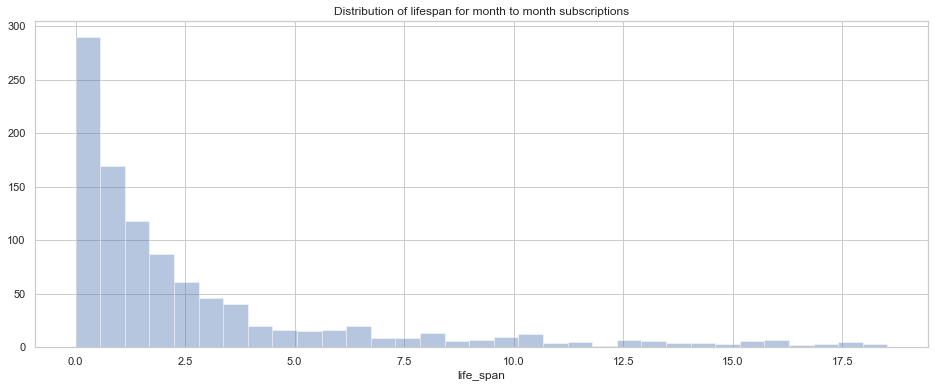

In [1133]:
#Some of them actually upgraded to annual plan
plt.figure(figsize=(16, 6))
ax = sns.distplot(lifespan_m2m, kde=False)
ax.set_title("Distribution of lifespan for month to month subscriptions")

plt.show()

In [1134]:
#Cancellation is more likely at round 17th which is the renewal date
#People are more likely to subscribe 1 week before the subscription cutoff date probably due to promotions


date_analysis = subscriptions.groupby('cancel_date').size().to_frame(name = 'count').reset_index().iloc[:-1]
date_analysis.rename(columns={'cancel_date':'Date','count':'cancel_date'}, inplace = True)
date_analysis['subscribe_date'] = subscriptions.groupby('subscribe_date').size().to_frame(name = 'count').reset_index()['count']
date_analysis

,Date,cancel_date,subscribe_date
0,1,26,78
1,2,10,44
2,3,14,54
3,4,14,42
4,5,20,72
5,6,26,51
6,7,34,124
7,8,34,27
8,9,31,43
9,10,39,37


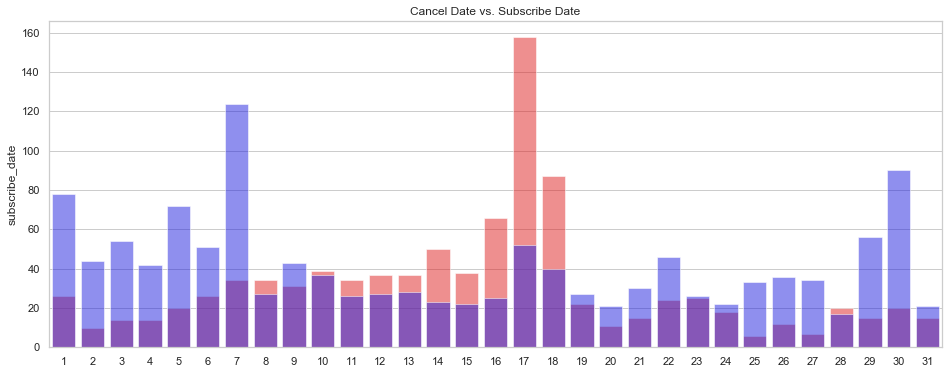

In [1135]:
#Add a hist chart
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Date", y="cancel_date", data=date_analysis, color='red',alpha=0.5,ci=None)
ax = sns.barplot(x="Date", y="subscribe_date", data=date_analysis, color='blue',alpha=0.5,ci=None)

ax.set_title("Cancel Date vs. Subscribe Date")
ax.set_xlabel('')
plt.show()

In [1136]:
#People are more likely to cancel at nights
#But subscribe happen at night and in the afternoon: maybe send emails just before they have time to subscribe

hour_analysis = pd.merge(subscriptions.groupby('cancel_hour').size().to_frame(name ='cancel_hour'), subscriptions.groupby('subscribe_hour').size().to_frame(name ='subscribe_hour'), left_index=True, right_index=True, how='outer').reset_index().iloc[:-1].fillna(0)
hour_analysis.rename(columns={'index':'Hour'}, inplace = True)
hour_analysis

,Hour,cancel_hour,subscribe_hour
0,0,51.0,41.0
1,1,21.0,15.0
2,2,10.0,7.0
3,3,2.0,2.0
4,4,0.0,1.0
5,5,5.0,0.0
6,6,13.0,13.0
7,7,17.0,12.0
8,8,37.0,28.0
9,9,56.0,52.0


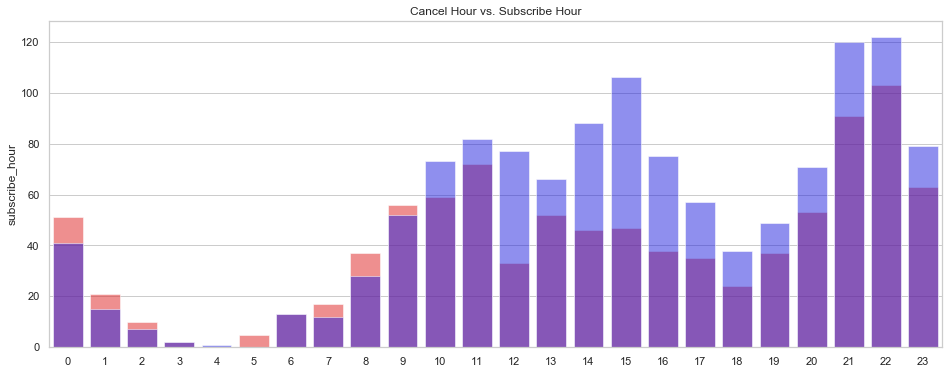

In [1137]:
#Add a hist chart
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Hour", y="cancel_hour", data=hour_analysis, color='red',alpha=0.5,ci=None)
ax = sns.barplot(x="Hour", y="subscribe_hour", data=hour_analysis, color='blue',alpha=0.5,ci=None)

ax.set_title("Cancel Hour vs. Subscribe Hour")
ax.set_xlabel('')
plt.show()

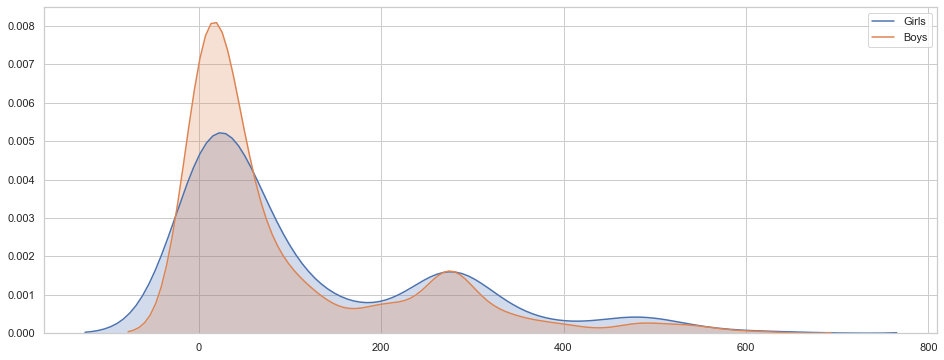

In [1138]:
#Hypothesis: girls are earlier to develop language skills and like books than boys and thus more revenues from this group

subscriptions_girls = subscriptions.loc[subscriptions['Child_Gender']=='Girl',:] 
subscriptions_boys = subscriptions.loc[subscriptions['Child_Gender']=='Boy',:] 

plt.figure(figsize=(16, 6))
ax = sns.kdeplot(subscriptions_girls['Total Revenue'], shade = True, label="Girls")
ax = sns.kdeplot(subscriptions_boys['Total Revenue'], shade = True, label="Boys")

plt.legend()
plt.show()

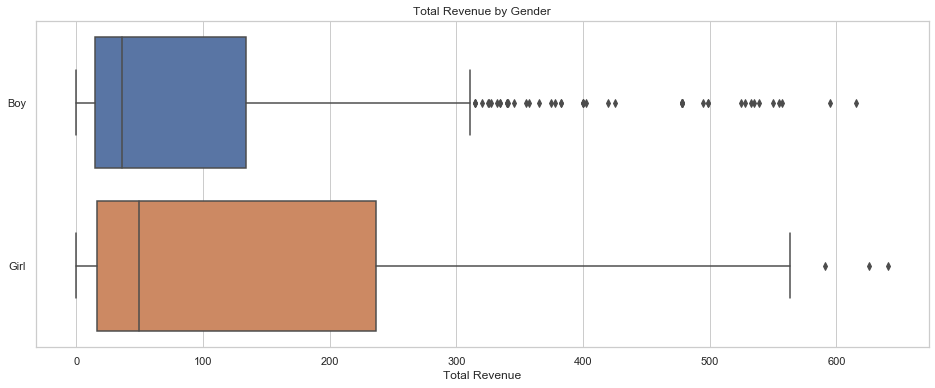

In [1139]:
#Revenue by gender
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="Child_Gender", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by Gender")
ax.set_ylabel('')

plt.show()

In [1140]:
#mean, median and all percentiles are higher for girls but it also have a higher stdev
subscriptions_girls['Total Revenue'].describe()

count    647.000000
mean     119.847342
std      143.092741
min        0.000000
25%       15.960000
50%       49.900000
75%      236.775000
max      640.660000
Name: Total Revenue, dtype: float64

In [1141]:
subscriptions_boys['Total Revenue'].describe()

count    627.000000
mean      98.252297
std      130.210762
min        0.000000
25%       14.985000
50%       35.910000
75%      134.180000
max      615.710000
Name: Total Revenue, dtype: float64

In [1142]:
#Run a T Test
#Null: the means are the same for girls and boys
#Null is rejected
#This is assuming holding all other variables constant
#A multivariate regression will be more rigorous in controlling other features

from scipy import stats
#np.random.seed(88)

revenue_girls = subscriptions_girls['Total Revenue']
revenue_boys = subscriptions_boys['Total Revenue']

#t, p = stats.ttest_ind(Q2_PRICE,Q4_PRICE)
t, p = stats.ttest_ind(revenue_girls, revenue_boys, equal_var=False)
print("t = " + str(t))
print("p = " + str(p))

t = 2.818896262353658
p = 0.0048938899283382025


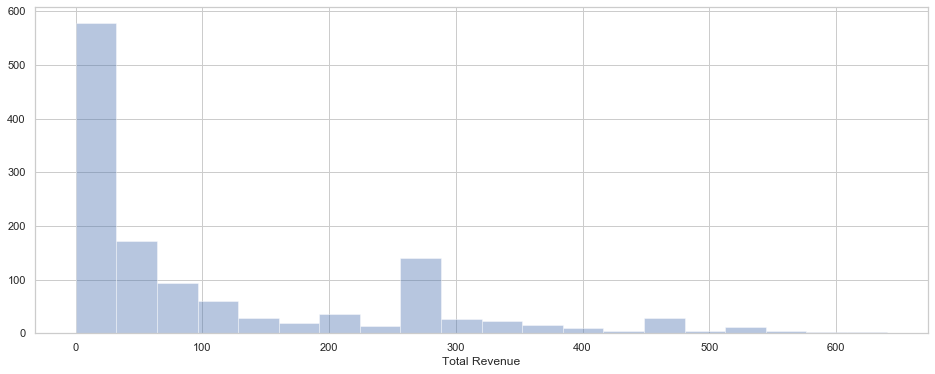

In [1143]:
#Plot the distribution of total revenue
#Long tail on the right
#The peak at 275 is the cost of 1 year subscription

plt.figure(figsize=(16, 6))
ax = sns.distplot(subscriptions['Total Revenue'], kde=False)
plt.show()

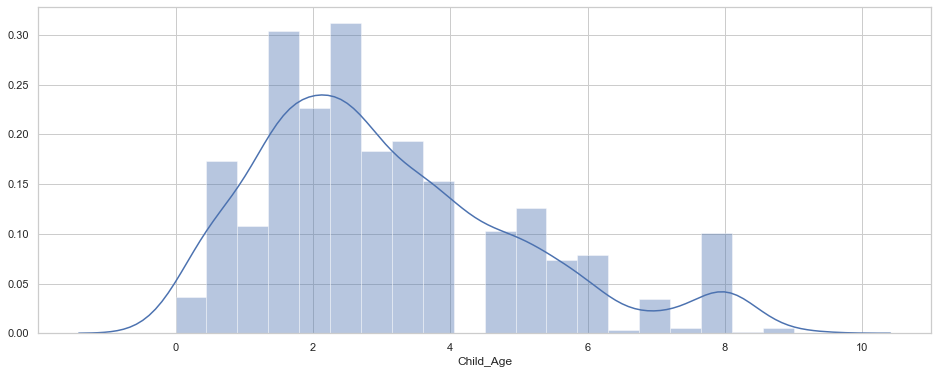

In [1144]:
#Plot the distribution of child age
#Long tail on the right
plt.figure(figsize=(16, 6))
ax = sns.distplot(subscriptions['Child_Age'])
plt.show()

In [1145]:
subscriptions.head()

,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,upgrade,life_span
0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,21.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,21.0
1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,24.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,24.0
2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.5,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,30.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,30.0
3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.5,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,32.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,32.0
4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,2707797304,12 Month Prepay,0-2 box,1.5,Girl,Not_Used_Coupon,2020-01-29 04:55:18,2021-01-17,,2020-01-29 07:55:18-05:00,,NaN,34.0,29,7,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,34.0


In [1146]:
subscriptions.groupby('Status').mean()

,Subscription ID,Total Revenue,Initial Order ID,Child_Age,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,upgrade,life_span
Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
active,2.195282e+09,281.873883,2.195277e+09,3.037961,NaN,293.569579,15.333333,14.928803,0.061489,0.213592,0.666667,0.119741,0.653722,0.346278,1.0,0.0,0.0,0.514563,0.485437,0.029126,0.970874,0.404531,0.595469,0.012945,0.009709,0.0,0.006472,0.000000,0.000000,0.009709,0.000000,0.000000,0.000000,0.003236,0.000000,0.006472,0.003236,0.000000,0.016181,0.000000,0.000000,0.003236,0.016181,0.000000,0.000000,0.000000,0.000000,0.009709,0.000000,0.003236,0.022654,0.000000,0.003236,0.006472,0.0,0.009709,0.012945,0.042071,0.000000,0.003236,0.003236,0.000000,0.009709,0.003236,0.006472,0.000000,0.003236,0.003236,0.029126,0.003236,0.009709,0.003236,0.003236,0.003236,0.012945,0.000000,0.000000,0.000000,0.058252,0.012945,0.0,0.000000,0.006472,0.000000,0.000000,0.000000,0.003236,0.000000,0.003236,0.003236,0.042071,0.000000,0.000000,0.093851,0.003236,0.012945,0.003236,0.000000,0.003236,0.000000,0.268608,0.724919,0.540453,0.0,293.569579
cancelled,2.008525e+09,55.287461,2.008524e+09,3.101510,78.201342,NaN,14.248322,15.343400,0.050336,0.361298,0.494407,0.144295,0.049217,0.950783,0.0,1.0,0.0,0.130872,0.869128,0.003356,0.996644,0.519016,0.480984,0.008949,0.008949,0.0,0.011186,0.001119,0.002237,0.005593,0.012304,0.002237,0.003356,0.005593,0.003356,0.000000,0.000000,0.003356,0.015660,0.001119,0.001119,0.002237,0.146532,0.002237,0.002237,0.001119,0.006711,0.004474,0.010067,0.001119,0.213647,0.004474,0.000000,0.002237,0.0,0.002237,0.000000,0.097315,0.002237,0.014541,0.002237,0.001119,0.008949,0.012304,0.004474,0.002237,0.000000,0.011186,0.516779,0.000000,0.003356,0.003356,0.000000,0.000000,0.020134,0.001119,0.004474,0.001119,0.030201,0.000000,0.0,0.004474,0.020134,0.001119,0.000000,0.002237,0.000000,0.001119,0.003356,0.001119,0.016779,0.001119,0.003356,0.005593,0.001119,0.015660,0.003356,0.004474,0.001119,0.003356,0.267338,0.610738,1.312081,0.0,78.201342
expired,1.988956e+09,36.892958,1.988956e+09,3.315915,65.464789,NaN,13.915493,14.422535,0.014085,0.352113,0.507042,0.140845,0.056338,0.943662,0.0,0.0,1.0,0.183099,0.816901,0.760563,0.239437,0.535211,0.464789,0.028169,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.014085,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.028169,0.000000,0.000000,0.000000,0.014085,0.014085,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,0.281690,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.042254,0.000000,0.014085,0.014085,0.000000,0.000000,0.084507,0.000000,0.000000,0.000000,0.000000,0.661972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000,0.0,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.042254,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,0.014085,0.183099,0.788732,1.352113,0.0,65.464789


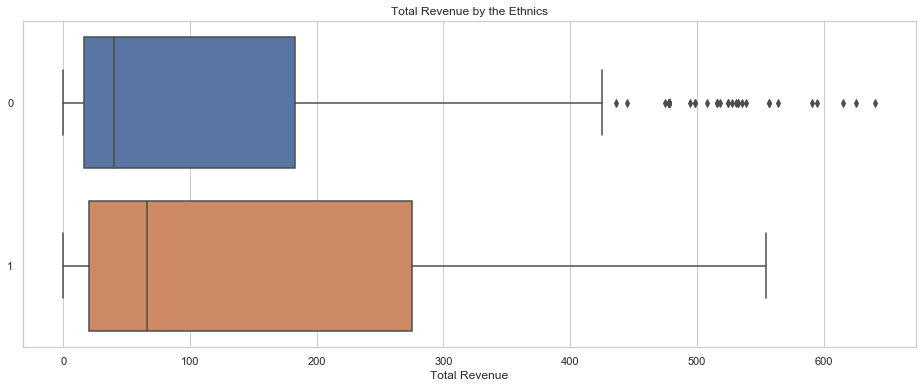

In [1147]:
#American families tend to spend more
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="american", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by the Ethnics")
ax.set_ylabel('')

plt.show()

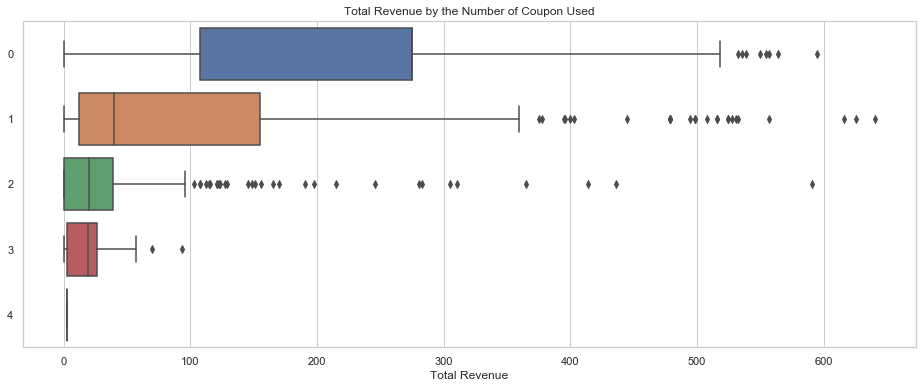

In [1148]:
#Revenue by coupon used
#WOW, this is interesting! More coupons used -> less revenue from the customers (obviously but not so obvoiusly)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="Num_Coupons_Used", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by the Number of Coupon Used")
ax.set_ylabel('')

plt.show()

In [1149]:
subscriptions.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1342
Data columns (total 126 columns):
Subscription ID         1274 non-null int64
First Name              1274 non-null object
Last Name               1267 non-null object
Email                   1274 non-null object
Status                  1274 non-null object
Total Revenue           1274 non-null float64
Fulfillment Status      1274 non-null object
Is a Gift               1274 non-null object
Shipping City           1274 non-null object
Shipping Zip            1274 non-null object
Shipping Province       1274 non-null object
Shipping Country        1274 non-null object
Initial Order ID        1274 non-null int64
Term                    1274 non-null object
Subscription_Product    1274 non-null object
Child_Age               1274 non-null float64
Child_Gender            1274 non-null object
Coupon_Used             1274 non-null object
Start_Date_dt           1274 non-null datetime64[ns]
End_Date_dt             1274 

In [1150]:
subscriptions.describe()

,Subscription ID,Total Revenue,Initial Order ID,Child_Age,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,upgrade,life_span
count,1.274000e+03,1274.000000,1.274000e+03,1274.000000,965.000000,309.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.00000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.0,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.0,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.0,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.0,1274.000000
mean,2.052731e+09,109.219325,2.052729e+09,3.098046,77.264249,293.569579,14.492936,15.191523,0.051020,0.324961,0.536892,0.138148,0.196232,0.803768,0.242543,0.701727,0.05573,0.226845,0.773155,0.051805,0.948195,0.492151,0.507849,0.010989,0.008634,0.0,0.009419,0.000785,0.001570,0.006279,0.009419,0.002355,0.002355,0.004710,0.002355,0.001570,0.000785,0.003140,0.016484,0.000785,0.000785,0.002355,0.107535,0.002355,0.001570,0.000785,0.005495,0.005495,0.007064,0.001570,0.171115,0.003140,0.000785,0.003140,0.0,0.003925,0.003140,0.080848,0.001570,0.011774,0.003140,0.000785,0.008634,0.014129,0.004710,0.001570,0.000785,0.008634,0.406593,0.000785,0.004710,0.003140,0.000785,0.000785,0.017268,0.000785,0.003140,0.000785,0.036892,0.003140,0.0,0.003140,0.015699,0.000785,0.000785,0.001570,0.000785,0.000785,0.003140,0.001570,0.024333,0.000785,0.002355,0.026688,0.001570,0.014914,0.003140,0.003140,0.001570,0.003140,0.262951,0.648352,1.127159,0.0,129.727630
std,2.707420e+08,137.276334,2.707401e+08,1.931814,98.826242,167.173075,9.687515,5.710705,0.220126,0.468544,0.498833,0.345190,0.397302,0.397302,0.428789,0.457680,0.22949,0.418956,0.418956,0.221721,0.221721,0.500135,0.500135,0.104292,0.092555,0.0,0.096632,0.028017,0.039606,0.079025,0.096632,0.048488,0.048488,0.068491,0.048488,0.039606,0.028017,0.055967,0.127376,0.028017,0.028017,0.048488,0.309914,0.048488,0.039606,0.028017,0.073950,0.073950,0.083785,0.039606,0.376757,0.055967,0.028017,0.055967,0.0,0.062548,0.055967,0.272708,0.039606,0.107909,0.055967,0.028017,0.092555,0.118068,0.068491,0.039606,0.028017,0.092555,0.491391,0.028017,0.068491,0.055967,0.028017,0.028017,0.130321,0.028017,0.055967,0.028017,0.188570,0.055967,0.0,0.055967,0.124355,0.028017,0.028017,0.039606,0.028017,0.028017,0.0

In [1151]:
#Group by subscription status
#some expired are due to CC expired (a nice way to cancel :()
subscriptions.groupby('Status').size()

Status
active       309
cancelled    894
expired       71
dtype: int64

In [1152]:

#lengh of subscription AND revenue total
#Someone who is canceled but subscribed for a long time vs. someone who just subscribed 1 month

In [1153]:
#Cancellation Data
cancellations = pd.read_csv(data_path + "Subscription/cancellations.csv", encoding="utf8")
cancellations.head(2)

,id,customer_id,first_name,last_name,name,email,phone_number,log_type,product_names,product_ids,subscription_id,subscription_term,subscription_start_date,cancel_reason,note,log_time,ship_to,ship_street,ship_unit,ship_city,ship_state,ship_zip_code,ship_country,location,country,months_subscribed
0,2739933823,1938363638,Yuehua,Fang,Yuehua Fang,personalfang@gmail.com,NaN,cancelled,"2-5岁熊猫盒子, 2-5岁熊猫盒子, 2-5岁熊猫盒子","2010794217, 2010794217, 2010794217",2566554451,Month to Month,2019-11-27T07:12:33Z,did_not_like_product,Do not like the March box,2020-02-11T11:35:23Z,Yuehua Fang,3146 Golfview Dr.,NaN,Saline,MI,48176,US,"MI, US",US,3
1,2738849995,2411096922,Yue,Zhao,Yue Zhao,hellozhaoyue@gmail.com,NaN,cancelled,"0-2岁熊猫盒子, 0-2岁熊猫盒子","2005236928, 2005236928",2411097273,12 Month Prepay,2019-09-15T22:30:17Z,resubscribe_later,Allow change age range within yearly subscript...,2020-02-10T23:27:30Z,Yue Zhao,2133 cook drive,NaN,Easton,PA,18045,US,"PA, US",US,5


In [1154]:
cancel_reason_count = cancellations.groupby('cancel_reason').size().sort_values(ascending=False)

cancel_reason_count/cancel_reason_count.sum()

cancel_reason
resubscribe_later       0.292233
test_it_out             0.182524
other                   0.180583
did_not_like_product    0.071845
gift                    0.061165
prevent_renewal         0.046602
not_worth_price         0.041748
accidental_order        0.039806
trying_other_service    0.033010
merchant_cancelled      0.021359
other_service_issue     0.015534
shipping_issues         0.011650
fraud                   0.000971
billed_twice            0.000971
dtype: float64

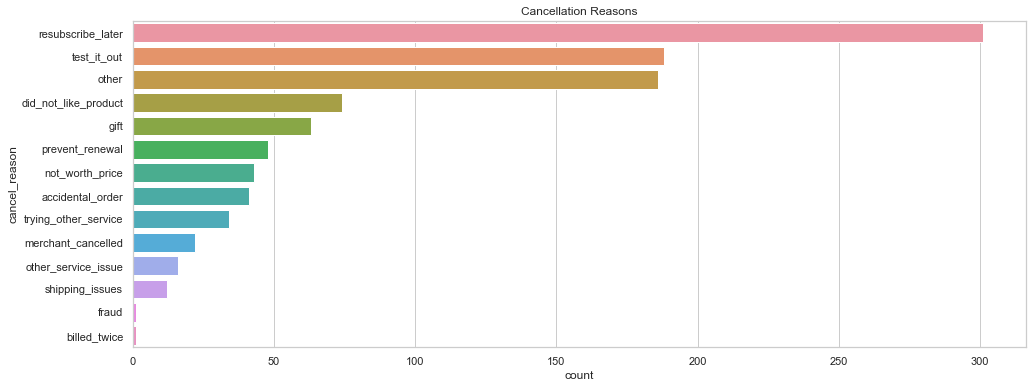

In [1155]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(y="cancel_reason", data=cancellations, order = cancellations['cancel_reason'].value_counts().index)
ax.set_title("Cancellation Reasons")
plt.show()

In [1156]:
#Cancellation reason notes
#potentially can do some NLP analysis

In [1157]:
cancellations.shape

(1101, 26)

In [1158]:
#box content data
box = pd.read_csv(data_path + "Subscription/box.csv", encoding="utf8")
box = box.fillna(0)
box['Day'] = 15

In [1159]:
box['num_books'] = box['num_hardcover'] + box['num_boardbook'] +  box['num_3d'] +  box['num_softcover'] +  box['num_chapter']
box['num_others'] = box['num_stickers'] + box['num_crafts'] +  box['num_stationary']
box['num_all'] = box['num_books'] + box['num_others']

box['Time']= pd.to_datetime(box[['Year','Month','Day']])
box = box.drop(columns=['Day'])
box.head()

,Year,Month,Age,Theme,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,Time
0,2018,9,0-2 box,Moon,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,46.00,2.0,1.0,3.0,2018-09-15
1,2018,9,2-5 box,Moon,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.00,2.0,1.0,3.0,2018-09-15
2,2018,9,5+ box,Moon,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,52.50,2.0,1.0,3.0,2018-09-15
3,2018,10,0-2 box,Halloween,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,67.20,2.0,3.0,5.0,2018-10-15
4,2018,10,2-5 box,Halloween,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,65.83,2.0,2.0,4.0,2018-10-15


In [1160]:
box.tail()

,Year,Month,Age,Theme,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,Time
49,2020,1,2-5 box,Mouse,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,55.30,3.0,2.0,5.0,2020-01-15
50,2020,1,5+ box,Mouse,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,71.76,3.0,2.0,5.0,2020-01-15
51,2020,2,0-2 box,Health,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.50,4.0,1.0,5.0,2020-02-15
52,2020,2,2-5 box,Health,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.30,4.0,0.0,4.0,2020-02-15
53,2020,2,5+ box,Health,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.50,3.0,0.0,3.0,2020-02-15


In [1161]:
#Combine end date and cancel date into one column
subscriptions['end_date_all'] = subscriptions['End_Date_dt']
subscriptions.loc[subscriptions['Cancel_Date_dt']!='','end_date_all'] = subscriptions.loc[subscriptions['Cancel_Date_dt']!='','Cancel_Date_dt']
subscriptions = subscriptions.reset_index()

new_cols = ['num_hardcover','num_boardbook','num_3d','num_softcover','num_chapter','num_stickers','num_crafts','num_stationary',
               'cost','num_books','num_others','num_all']

new_cols_latest = [s + '_last' for s in new_cols]

for col in new_cols:
    subscriptions[col] = 0

for col in new_cols_latest:
    subscriptions[col] = 0
    

In [1162]:
subscriptions.head(2)

,index,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,upgrade,life_span,end_date_all,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,num_hardcover_last,num_boardbook_last,num_3d_last,num_softcover_last,num_chapter_last,num_stickers_last,num_crafts_last,num_stationary_last,cost_last,num_books_last,num_others_last,num_all_last
0,0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.0,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,21.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,21.0,2021-02-17 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.0,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,24.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,24.0,2021-02-17 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1163]:
#Loop over each row and calculate the average costs/number of items across all boxes and the last box they received

for index, row in subscriptions.iterrows():
    
    start_date = row['Start_Date_dt']
    end_date = row['end_date_all']
    age_group = row['Subscription_Product']

    box_received = box.loc[(box['Age']==age_group) & (box['Time']<=end_date) & (box['Time']>=start_date),
           'num_hardcover':'num_all']
    avg_box = box_received.mean(axis=0)
    subscriptions.loc[index, new_cols] = avg_box

    last_box = box_received.iloc[-1:,].mean(axis=0)
    last_box.index= new_cols_latest
    subscriptions.loc[index, new_cols_latest] = last_box

In [1164]:
#If NAs for the box info, it suggest their cancel date is not long after subscribe date
#And generally suggests they cancels before receiving the box
#Maybe they just don't want to auto-renewed 

subscriptions

,index,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,upgrade,life_span,end_date_all,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,num_hardcover_last,num_boardbook_last,num_3d_last,num_softcover_last,num_chapter_last,num_stickers_last,num_crafts_last,num_stationary_last,cost_last,num_books_last,num_others_last,num_all_last
0,0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.50,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,21.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,21.0,2021-02-17 00:00:00,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.500,4.0,1.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.50,4.0,1.0,5.0
1,1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.50,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,24.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,24.0,2021-02-17 00:00:00,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.300,4.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.30,4.0,0.0,4.0
2,2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.50,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,30.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,30.0,2021-01-17 00:00:00,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.500,4.0,1.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.50,4.0,1.0,5.0
3,3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.50,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,32.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,32.0,2020-02-17 00:00:00,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.300,4.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.30,4.0,0.0,4.0
4,4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,2707797304,12 Month Prepay,0-2 box,1.50,Girl,Not_Used_Coupon,2020

C:\Users\yyzhao\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


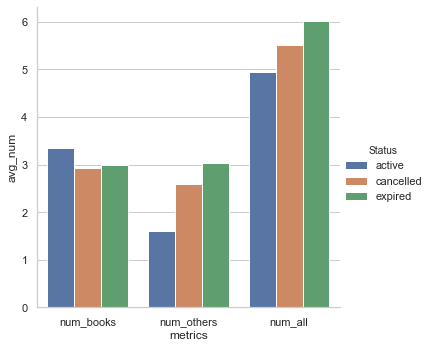

In [1165]:
#Intersting, on average, if there're less books in the lifepsan of the client's subscription, they're more liketly to cancel
#However, more other stuff dosn't help

avg_box_by_status = subscriptions.groupby('Status').mean()[['num_books','num_others','num_all']].reset_index()
avg_box_by_status = pd.melt(avg_box_by_status, id_vars="Status", var_name="metrics", value_name="avg_num")

sns.factorplot(x='metrics', y='avg_num', hue='Status', data=avg_box_by_status, kind='bar')

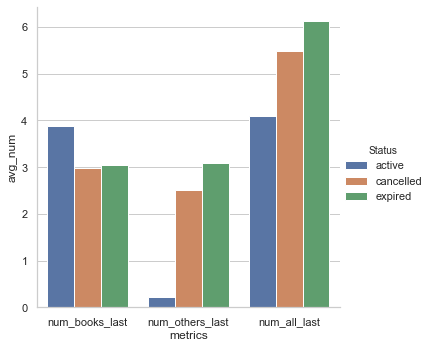

In [1166]:
#Intersting, on average, if there're less books in the most recent box, they're more liketly to cancel

last_box_by_status = subscriptions.groupby('Status').mean()[['num_books_last','num_others_last','num_all_last']].reset_index()
last_box_by_status = pd.melt(last_box_by_status, id_vars="Status", var_name="metrics", value_name="avg_num")

sns.factorplot(x='metrics', y='avg_num', hue='Status', data=last_box_by_status, kind='bar')

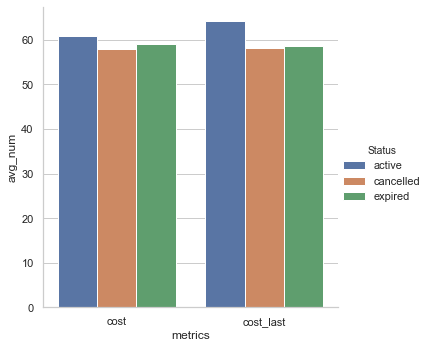

In [1167]:
#Lower costs also might lead to cancellations but need to control for other variables to draw conclusions

cost_by_status = subscriptions.groupby('Status').mean()[['cost','cost_last']].reset_index()
cost_by_status = pd.melt(cost_by_status, id_vars="Status", var_name="metrics", value_name="avg_num")

sns.factorplot(x='metrics', y='avg_num', hue='Status', data=cost_by_status, kind='bar')

In [1168]:
#Feedback detail data
feedback_detail = pd.read_csv(data_path + "Subscription/feedback_detail.csv", encoding="utf8")
feedback_detail.head(2)

,Customer ID,Shipped On,Customer Name,Customer Email,Customer Since,Rating,Response,Subscription Status,Shipment ID,Tracking No
0,2570660648,01/10/2020,Bailey Bennetzen,lilianpc84@hotmail.com,11/28/2019,3,NaN,active,2632690902,9449009205568568537870
1,1814507977,01/10/2020,Cuiyan Mei,eddymei_1985@sina.com,10/22/2018,5,"From my first box till now, it has been over 1...",active,2545832418,9449009205568568538242


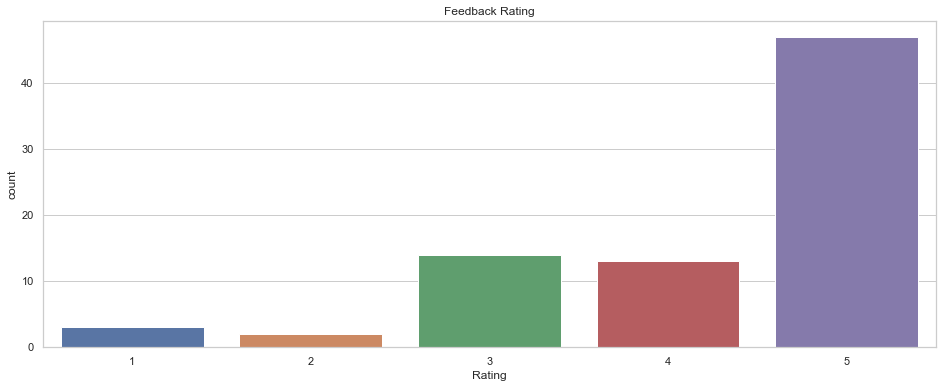

In [1169]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Rating", data=feedback_detail)
ax.set_title("Feedback Rating")
plt.show()

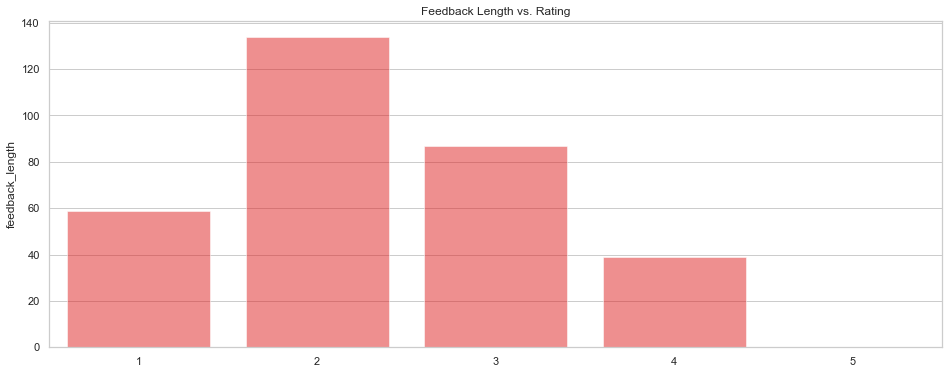

In [1170]:
#Interstingly, the longest comments are with rating 2 and 3
#If it's awesome, they usually just leave a 5 star
#If it's really bad, they don't want to waste their time

feedback_detail['feedback_length'] = feedback_detail['Response'].str.len().fillna(0)
feedback_len_analysis = feedback_detail.groupby('Rating').median().reset_index()

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Rating", y="feedback_length", data=feedback_len_analysis, color='red',alpha=0.5,ci=None)

ax.set_title("Feedback Length vs. Rating")
ax.set_xlabel('')
plt.show()

In [1171]:
#Average for customers who give more than 1 score before merging
feedback_detail = feedback_detail.groupby('Customer Email').mean().reset_index()

In [1172]:
#Merge the rating and feedback length data to subscriptions
#Most clients actually didn't leave any rating/feedback
subscriptions = pd.merge(subscriptions, feedback_detail[['Customer Email','Rating','feedback_length']], left_on = 'Email', right_on='Customer Email', how='left')
subscriptions = subscriptions.drop(columns=['Customer Email'])

#Add a new feature if there's rating given
subscriptions['If_Any_Rating'] = 1
subscriptions.loc[subscriptions['Rating'].isnull(),'If_Any_Rating'] = 0

#Fill in NA with median
subscriptions['Rating'].fillna(feedback_detail['Rating'].median(), inplace = True) #this is 5
subscriptions['feedback_length'].fillna(feedback_detail['feedback_length'].median(), inplace = True)  #this is 0

subscriptions.head()

,index,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,upgrade,life_span,end_date_all,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,num_hardcover_last,num_boardbook_last,num_3d_last,num_softcover_last,num_chapter_last,num_stickers_last,num_crafts_last,num_stationary_last,cost_last,num_books_last,num_others_last,num_all_last,Rating,feedback_length,If_Any_Rating
0,0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,21.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,21.0,2021-02-17 00:00:00,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.5,4.0,1.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.5,4.0,1.0,5.0,5.0,24.0,0
1,1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,24.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,24.0,2021-02-17 00:00:00,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.3,4.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.3,4.0,0.0,4.0,5.0,24.0,0
2,2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.5,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,30.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,30.0,2021-01-17 00:00:00,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.5,4.0,1.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.5,4.0,1.0,5.0,5.0,24.0,0
3,3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.5,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,32.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,32.0,2020-02-17 00:00:00,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.3,4.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.3,4.0,0.0,4.0,5.0,24.0,0
4,4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,

In [1173]:
#One-time Order Data
onetime_order = pd.read_csv(data_path + "Subscription/onetimeorder_legacy.csv", encoding="utf8")
onetime_order.head(2)

,order_id,customer,email,order_status,financial_status,fulfillment_status,products,note,placed_at,total,total_price,total_tax,total_shipping,coupon,is_gift,gift_message
0,1720369671,"Yu, Lan",yllovelyever@yahoo.com,closed,paid,fulfilled,低幼启蒙畅销书-安全撕不烂！0-4岁幼儿认知小百科3本,NaN,2018-08-26 21:58:09.221598,3094,2495,231,368,NaN,False,NaN
1,1720455853,"Zhu, Yi",joyzhuyi814@gmail.com,closed,paid,fulfilled,"节日主题熊猫盒子2-5岁, 超好玩的《中秋节》节日体验3D立体绘本",NaN,2018-08-26 22:36:12.350539,4404,3291,296,817,PANDA09,False,NaN


In [1174]:
#products is str type, convert it dummies of products
onetime_order = pd.concat([onetime_order, onetime_order['products'].str.get_dummies(sep=',')], axis=1)

#Create a new feature that counts the number of products bought
onetime_order['num_onetime'] = onetime_order.iloc[:,16:].sum(axis=1)

In [1175]:
#Summing up for customers who have more than 1 orders before merging
onetime_order = onetime_order.groupby('email').sum().reset_index()

onetime_order.rename(columns={'total':'revenue_onetime'}, inplace = True)

onetime_order = onetime_order.drop(columns=['order_id','total_price','total_tax','total_shipping','is_gift'])
onetime_order['revenue_onetime'] = onetime_order['revenue_onetime']/100


In [1176]:
onetime_order.head()

,email,revenue_onetime,100层的房子绘本系列全套3册精装地下100层+海底100层,STEM主题熊猫盒子5岁+,《十二生肖谁第一》 金羽毛世界获奖绘本,《小猪佩奇过大年》套装7册 - 电影同名动画故事书,《有趣的月亮观察绘本》一本读懂月亮“阴晴圆缺”好玩的书,《正面管教》修订版,不可不知的《中国传统节日故事》全8册,不用请家教，不用妈妈教，宝宝自己就能学！《我会读古诗》国学经典发声书,与孩子一起做好玩的手工！《365个艺术创意》,专为书写敏感期孩子量身打造！小象汉字《字课》全4本,世界的一天,世界经典立体书珍藏版：哈利波特魔法立体书,世界经典立体书珍藏版：大闹天宫,世界经典立体书珍藏版：灰姑娘,世界经典立体书珍藏版：爱丽丝漫游奇境,中信出版必属精品！清明上河图童话版（套装共2册）骑驴记 回娘家,中华瑰宝！书法三件套：毛笔+万次水写布+墨碟,中国原创科普！《这就是二十四节气》彩绘版套装4册,中国原创！《熊亮中国绘本》第二辑共7本,中国地图：跟着爸爸一起旅行,中国城市亲子游系列5册,中国年原创图画书系列珍藏版6册,中国年欢乐顶级礼盒：3D立体书+23种民俗59张纸艺,中国幼儿拼音小词典,中国航天启蒙3D翻翻书 卫星观海洋,中国航天启蒙3D翻翻书 神舟飞天宫,中英双修两不误！《英语单词大书》中英双语版纸板书 - 内含1000个常用词,为什么我的童年没有这么好看的书！《不一样的卡梅拉》第一季全12册,乐乐趣《揭秘海洋》3D立体翻翻书,乐乐趣《揭秘计算机》，搬砖从娃娃抓起,乐乐趣揭秘系列第一辑《揭秘恐龙》3D立体翻翻书,乐乐趣揭秘系列第一辑《揭秘科学》3D立体翻翻书,乐乐趣揭秘系列第一辑全4册 - 每个家庭都必入的科普童书,乐乐趣揭秘系列第二辑《揭秘数学》3D立体翻翻书,九色鹿,九色鹿 精装版,了不起的熊猫宝贝,二十四节气童话,亲亲自然 全11册,亲爱的熊猫绘本盒子-万圣节,亲爱的熊猫绘本盒子-圣诞节,亲爱的熊猫🎄圣诞大礼盒！包邮哦亲~,人体先生和人体太太,伊伊，端午节快乐,伊索寓言 小学语文新课标必读丛书注音版,低幼启蒙畅销书-安全撕不烂！0-4岁幼儿认知小百科3本,你好！世界 共六册 亲子互动绘本,保冬妮海洋馆系列第一辑套装6册,保冬妮海洋馆绘本第二辑套装6册,做内心强大的自己自信力培养系列8册,儿科医生特别推荐！《可爱的身体》全8册,儿童性教育启蒙《我们的身体》人体百科立体翻翻书,充满想象力热爱自然的经典《巴巴爸爸套装》全10册,充满美感的幼儿中文早教《自然课》,兔子坡 原版插图版,兔小弟进城 +月亮小兔2册,入选中国儿童分级阅读书目！《我的后面是谁呢》全5册,全景创意磁力贴 快快乐乐学数学 中英双语,全面提升书写能力！儿童魔法凹槽练字帖,全面提升宝宝15种能力！《0-3岁专注力训练贴纸书》全6册,冰雪花园立体拼插精美House,创意大师拉拉翻翻大惊喜系列全7册,力学原来这么有趣,十四只老鼠套装全12册,去旅行中国版,古力和古拉系列,可以自己任意编故事的神书！《MAMOKO妈妈看！》全3册,可爱的心都化了！《小鸡球球触感玩具书》全5册,和孩子一起读的艺术史,和萌萌哒熊猫学礼仪~ 《熊猫先生礼仪课堂》全4册,四合院里的小时候,国内火到已卖断货！《小象汉字2019日历》,国际大奖科普系列绘本全6册,圣诞老爸的来信,在童话里学拼音！《魔法拼音国》 全7册,培养孩子受益一生的思考方式！《走进奇妙的数学世界》全3册,培养爸爸和孩子关系的《小熊和最好的爸爸》平装全7册,培养独立思考能力！《有故事的汉字》全12册,大人小孩都闻的停不下来！《来，闻闻大自然的味道》,大闹天宫 彩色大字注音版 中国经典获奖童话 套装5册,天文迷的心头好！《浩瀚的宇宙》3D翻翻玩具书,太空猫：星际穿越 宇宙奥秘探索科普少儿百科书,女娃爱不释手的中国娃娃！《民族娃娃换装书》全3册,好玩又好看！《偷偷看里面》系列第一辑4本 翻翻书 0-3岁,好玩又好看！《偷偷看里面》系列第二辑4本 翻翻书 0-3岁,好玩的揭秘华夏系列《揭秘二十四节气》3D翻翻书 - 了解中国文化,好玩的揭秘华夏系列《揭秘古诗词》3D翻翻书 - 艺术品一样的存在,好玩的揭秘华夏系列《揭秘汉字》3D翻翻书 - 学习汉字必读！,好玩的旷世巨作！《中国历史地图人文版》,妈妈买绿豆,妈妈使用手册,妈妈在公司想我吗,妈妈我真的很生气,妈妈有怪兽,妈妈，打勾勾,娃的心头好！小猪佩奇双语故事纸板书 全4册,学拼音SO EASY！小象汉字aoe拼音卡,学拼音用它就对了！《拼音王国名家经典书》全10册,学汉字不用再死记硬背了！边学边玩：《汉字是画出来的》,孩子和大人都收获满满的《好好照顾我的花》,孩子应该知道的事都在这里！《DK幼儿百科全书—那些重要的事》,孩子看得爱不释手！《手绘中国地理地图》,安的种子,完整的成长-儿童生命的自我创造（珍藏版）,宝宝一边唱，一边表演！《我会读童谣》国学经典发声书,宝宝古诗启蒙推拉书全4册,宝宝四大知识启蒙！《小猪佩奇双语认知启蒙泡泡书》套装4本,宝宝巴士奇妙好习惯套装20册,宝宝瞬间被吸引！- 视觉刺激触摸绘本-黑色的夜晚,宝宝第一套好性格养成书~《皮特猫》套装24册,实习小门神 中华传统节日故事注音版,寻找生命之美《我的收藏：寻找大自然的宝藏》,小兔不睡觉,小兔兜兜,小兔子的梦,小兔汤姆旅行版26册,小水的除夕,小猫当当第1辑+第2辑,小种子快长大水果篇,小种子快长大蔬菜篇,小粽子小粽子,小莲游莫奈花园系列绘本套装共2册,小象汉字我的第一本汉字书 第一辑4本,小象汉字我的第一本汉字书 第二辑4本,小鸡球球成长绘本,少年科学家的最爱《太空》手绘百科绘本,尼尔森的益智游戏盒,带宝宝爱上一座城！《城市运转的秘密》3D玩具书,带熊猫盒子去旅行,幼儿学古诗2册,幼儿认知手指轨道书,幽默中国风！《十二生肖的故事》,应对孩子的愤怒与攻击-布教授有办法,建天坛,建长城,开怀大笑学成语！米小圈漫画成语（套装4册）,开车出发交通工具绘本大礼盒装 13册绘本4种车模,当滚滚遇见中外名画,影子爸爸,德国匠心制造，培养孩子专注力！《德国专注力养成大画册》全6册,心情不好时的治愈神器！《嗨，我喜欢你》,快乐识字必买经典！《四五快读》-全彩图升级版 全8册,恐龙 立体书,情绪魔法盒,意大利经典！奇妙洞洞书第一辑（全6册）,感动了世界的中国原创《团圆》,感动心灵的温馨故事《彼得兔和他的朋友们》全八册带拼音,我们小时候绘本3册,我们的历史：地图上的上下五千年,我们的地图旅行,我会读三字经,我妈妈上班去了,我家门外的自然课,我属猪,我爱发明,我的连衣裙,我讨厌妈妈,手绘版中国地理地图,托马斯和朋友 幼儿情绪管理绘本第1+2辑18册,托马斯和朋友双语阅读绘本,抖音爆款 - 会动耳朵的超萌帽子！,抖音爆款春节立体绘本《过年啦！》3D立体翻翻书,抖音爆款震撼惊艳《欢乐中国年》3D立体翻翻书,折耳兔瑞奇,拍成了大片的感人故事！《烟囱之城》,拼音学习必备启蒙！《拼音真好玩》全彩6册,捕捉儿童敏感期（珍藏版）,捧腹大笑的漫画历史！《半小时漫画中国史1+2+世界史》,揭秘海洋世界！《神秘海洋》立体翻翻书,搞定“小恶魔”！把可怕的两岁变成可爱的两岁~,教出乐观的孩子：让孩子受用一生的幸福经典,教孩子如何保护自己！《小猪佩奇“我会保护我自己”幼儿安全意识启蒙系列》全10册,数学大冒险全10册,新手妈妈的育儿宝典！《小熊宝宝绘本》全15册,旅之绘本 全6册,无处不在的数学 套装6册,春天的图画 语文一年级下册,春神跳舞的森林,春节儿童手工剪纸礼盒,春节拼图+贴纸+画画本！小猪佩奇新年终极大礼包！,最喜欢妈妈,最新大开本春节游戏书！小孩看热闹春节放花炮,最棒的情景式婴儿启蒙立体书！《噼里啪啦系列》全7册,最美地球绘本-海洋上下,有一天,有意思的中国画 套装10册,朱家故事,机械迷的心头好！《好忙好忙的大工地》3D翻翻玩具书,栩栩如生的可爱小动物！亮丽精美触摸书系列套装（共4册）,格林童话 美绘珍藏版,植物大战僵尸极品爆笑漫画 - 万圣节狂欢,母亲节盒子,汉声数学图画书（全41册+《妈妈手册》）,汉字启蒙教育！小象汉字甲骨文游戏字卡套装1 - 绿卡,汉字启蒙教育！小象汉字甲骨文游戏字卡套装2 - 红卡,汉字启蒙教育！小象汉字甲骨文游戏字卡套装3 - 黄卡,汪汪队立大功儿童安全救援故事书10册,汪汪队立大功儿童安全救援故事书第3辑,汽车迷的心头好！《最全最酷的交通工具》3D翻翻玩具书,法国孩子的第一套科普玩具书：忙碌的消防员+了不起的航天员+汽车的奥秘,洗澡也能看！《小猪佩奇幼儿认知拓展系列绘本礼盒》全10册,浪漫暖心熊猫绘本——《甜心和糖球去巴黎》,清华附小推荐！《我爸爸》+《我妈妈》经典绘本必读,清爽夏日海洋熊猫盒子,游中国翻翻书：故宫、长城（套装）附赠故宫立体模型,滴答滴答日本经典婴儿纸板书,火遍小红书的春节互动立体书：《开心过大年》！,熊亮中国绘本 全10册,熊猫盒子Priority Mail快递服务,熊猫盒子周年特别版,熊猫盒子春节特别版,熊猫盒子春节绘本礼盒+60张春节趣味剪纸 Combo Deal,熊猫盒子春节绘本礼盒！,爆笑可爱美食！《饺子和汤圆》,爱与自由-孙瑞雪经典,爱心树,爱车宝宝的最爱！《宝宝最爱的汽车推拉书》全4册,爸爸上班时想我吗,爸爸去上班,猜猜我有多爱你,玩转数学就这么简单！《我的第一本数学启蒙贴纸游戏书》6册套装,瑞奇在海边,畅销60年！《米菲认知洞洞书》共8册,畅销全球达半个世纪的旅行图画书巨制《This is米先生的世界旅游绘本全集》共16册,畅销百万册！《你看起来好像很好吃》宫西达也恐龙系列简装7册,皮皮

In [1177]:
#Merge to subscription data

subscriptions = pd.merge(subscriptions, onetime_order, left_on = 'Email', right_on='email', how='left')
subscriptions = subscriptions.drop(columns=['email'])

subscriptions.loc[:,'revenue_onetime':'num_onetime'] = subscriptions.loc[:,'revenue_onetime':'num_onetime'].fillna(0)
subscriptions.head()

,index,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,upgrade,life_span,end_date_all,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,num_hardcover_last,num_boardbook_last,num_3d_last,num_softcover_last,num_chapter_last,num_stickers_last,num_crafts_last,num_stationary_last,cost_last,num_books_last,num_others_last,num_all_last,Rating,feedback_length,If_Any_Rating,revenue_onetime,100层的房子绘本系列全套3册精装地下100层+海底100层,STEM主题熊猫盒子5岁+,《十二生肖谁第一》 金羽毛世界获奖绘本,《小猪佩奇过大年》套装7册 - 电影同名动画故事书,《有趣的月亮观察绘本》一本读懂月亮“阴晴圆缺”好玩的书,《正面管教》修订版,不可不知的《中国传统节日故事》全8册,不用请家教，不用妈妈教，宝宝自己就能学！《我会读古诗》国学经典发声书,与孩子一起做好玩的手工！《365个艺术创意》,专为书写敏感期孩子量身打造！小象汉字《字课》全4本,世界的一天,世界经典立体书珍藏版：哈利波特魔法立体书,世界经典立体书珍藏版：大闹天宫,世界经典立体书珍藏版：灰姑娘,世界经典立体书珍藏版：爱丽丝漫游奇境,中信出版必属精品！清明上河图童话版（套装共2册）骑驴记 回娘家,中华瑰宝！书法三件套：毛笔+万次水写布+墨碟,中国原创科普！《这就是二十四节气》彩绘版套装4册,中国原创！《熊亮中国绘本》第二辑共7本,中国地图：跟着爸爸一起旅行,中国城市亲子游系列5册,中国年原创图画书系列珍藏版6册,中国年欢乐顶级礼盒：3D立体书+23种民俗59张纸艺,中国幼儿拼音小词典,中国航天启蒙3D翻翻书 卫星观海洋,中国航天启蒙3D翻翻书 神舟飞天宫,中英双修两不误！《英语单词大书》中英双语版纸板书 - 内含1000个常用词,为什么我的童年没有这么好看的书！《不一样的卡梅拉》第一季全12册,乐乐趣《揭秘海洋》3D立体翻翻书,乐乐趣《揭秘计算机》，搬砖从娃娃抓起,乐乐趣揭秘系列第一辑《揭秘恐龙》3D立体翻翻书,乐乐趣揭秘系列第一辑《揭秘科学》3D立体翻翻书,乐乐趣揭秘系列第一辑全4册 - 每个家庭都必入的科普童书,乐乐趣揭秘系列第二辑《揭秘数学》3D立体翻翻书,九色鹿,九色鹿 精装版,了不起的熊猫宝贝,二十四节气童话,亲亲自然 全11册,亲爱的熊猫绘本盒子-万圣节,亲爱的熊猫绘本盒子-圣诞节,亲爱的熊猫🎄圣诞大礼盒！包邮哦亲~,人体先生和人体太太,伊伊，端午节快乐,伊索寓言 小学语文新课标必读丛书注音版,低幼启蒙畅销书-安全撕不烂！0-4岁幼儿认知小百科3本,你好！世界 共六册 亲子互动绘本,保冬妮海洋馆系列第一辑套装6册,保冬妮海洋馆绘本第二辑套装6册,做内心强大的自己自信力培养系列8册,儿科医生特别推荐！《可爱的身体》全8册,儿童性教育启蒙《我们的身体》人体百科立体翻翻书,充满想象力热爱自然的经典《巴巴爸爸套装》全10册,充满美感的幼儿中文早教《自然课》,兔子坡 原版插图版,兔小弟进城 +月亮小兔2册,入选中国儿童分级阅读书目！《我的后面是谁呢》全5册,全景创意磁力贴 快快乐乐学数学 中英双语,全面提升书写能力！儿童魔法凹槽练字帖,全面提升宝宝15种能力！《0-3岁专注力训练贴纸书》全6册,冰雪花园立体拼插精美House,创意大师拉拉翻翻大惊喜系列全7册,力学原来这么有趣,十四只老鼠套装全12册,去旅行中国版,古力和古拉系列,可以自己任意编故事的神书！《MAMOKO妈妈看！》全3册,可爱的心都化了！《小鸡球球触感玩具书》全5册,和孩子一起读的艺术史,和萌萌哒熊猫学礼仪~ 《熊猫先生礼仪课堂》全4册,四合院里的小时候,国内火到已卖断货！《小象汉字2019日历》,国际大奖科普系列绘本全6册,圣诞老爸的来信,在童话里学拼音！《魔法拼音国》 全7册,培养孩子受益一生的思考方式！《走进奇妙的数学世界》全3册,培养爸爸和孩子关系的《小熊和最好的爸爸》平装全7册,培养独立思考能力！《有故事的汉字》全12册,大人小孩都闻的停不下来！《来，闻闻大自然的味道》,大闹天宫 彩色大字注音版 中国经典获奖童话 套装5册,天文迷的心头好！《浩瀚的宇宙》3D翻翻玩具书,太空猫：星际穿越 宇宙奥秘探索科普少儿百科书,女娃爱不释手的中国娃娃！《民族娃娃换装书》全3册,好玩又好看！《偷偷看里面》系列第一辑4本 翻翻书 0-3岁,好玩又好看！《偷偷看里面》系列第二辑4本 翻翻书 0-3岁,好玩的揭秘华夏系列《揭秘二十四节气》3D翻翻书 - 了解中国文化,好玩的揭秘华夏系列《揭秘古诗词》3D翻翻书 - 艺术品一样的存在,好玩的揭秘华夏系列《揭秘汉字》3D翻翻书 - 学习汉字必读！,好玩的旷世巨作！《中国历史地图人文版》,妈妈买绿豆,妈妈使用手册,妈妈在公司想我吗,妈妈我真的很生气,妈妈有怪兽,妈妈，打勾勾,娃的心头好！小猪佩奇双语故事纸板书 全4册,学拼音SO EASY！小象汉字aoe拼音卡,学拼音用它就对了！《拼音王国名家经典书》全10册,学汉字不用再死记硬背了！边学边玩：《汉字是画出来的》,孩子和大人都收获满满的《好好照顾我的花》,孩子应该知道的事都在这里！《DK幼儿百科全书—那些重要的事》,孩子看得爱不释手！《手绘中国地理地图》,安的种子,完整的成长-儿童生命的自我创造（珍藏版）,宝宝一边唱，一边表演！《我会读童谣》国学经典发声书,宝宝古诗启蒙推拉书全4册,宝宝四大知识启蒙！《小猪佩奇双语认知启蒙泡泡书》套装4本,宝宝巴士奇妙好习惯套装20册,宝宝瞬间被吸引！- 视觉刺激触摸绘本-黑色的夜晚,宝宝第一套好性格养成书~《皮特猫》套装24册,实习小门神 中华传统节日故事注音版,寻找生命之美《我的收藏：寻找大自然的宝藏》,小兔不睡觉,小兔兜兜,小兔子的梦,小兔汤姆旅行版26册,小水的除夕,小猫当当第1辑+第2辑,小种子快长大水果篇,小种子快长大蔬菜篇,小粽子小粽子,小莲游莫奈花园系列绘本套装共2册,小象汉字我的第一本汉字书 第一辑4本,小象汉字我的第一本汉字书 第二辑4本,小鸡球球成长绘本,少年科

In [1187]:
#Active subscribers buy more of the onetime items as well.
subscriptions.groupby('Status').mean()[['revenue_onetime','num_onetime']]

,revenue_onetime,num_onetime
Status,,
active,47.544175,1.718447
cancelled,16.233367,0.567114
expired,11.689014,0.267606


In [1210]:
#Mail Campaign Data
mailchimp_subscribed = pd.read_csv(data_path + "Subscription/mailchimp_subscribed_members.csv", encoding="utf8")
mailchimp_subscribed['subscribed_mail'] = 1

mailchimp_unsubscribed = pd.read_csv(data_path + "Subscription/mailchimp_unsubscribed_members.csv", encoding="utf8")
mailchimp_unsubscribed['unsubscribed_mail'] = 1

mailchimp_cleaned = pd.read_csv(data_path + "Subscription/mailchimp_cleaned_members.csv", encoding="utf8")
mailchimp_cleaned['cleaned_mail'] = 1

mailchimp = pd.concat([mailchimp_subscribed, mailchimp_unsubscribed, mailchimp_cleaned],ignore_index=True)
mailchimp

C:\Users\yyzhao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


,Accepts Marketing,Address,Birthday,CC,CLEAN_CAMPAIGN_ID,CLEAN_CAMPAIGN_TITLE,CLEAN_TIME,CONFIRM_IP,CONFIRM_TIME,Cancellation Date,Customer Address,DSTOFF,EUID,Email Address,First Name,GMTOFF,Gift Only,Gifting Group,LAST_CHANGED,LATITUDE,LEID,LONGITUDE,Last Name,MEMBER_RATING,NOTES,OPTIN_IP,OPTIN_TIME,Phone Number,REGION,Subscription Status,TAGS,TIMEZONE,Total Revenue,UNSUB_CAMPAIGN_ID,UNSUB_CAMPAIGN_TITLE,UNSUB_REASON,UNSUB_REASON_OTHER,UNSUB_TIME,cleaned_mail,subscribed_mail,unsubscribed_mail,孩子年龄段,微信号
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.207.248.118,2019-04-02 17:48:19,NaN,NaN,NaN,6de51f2562,info@eyasmontessori.com,Eyas,NaN,NaN,NaN,2019-04-17 10:16:48,NaN,50413785,NaN,NaN,2,NaN,NaN,2019-04-02 17:48:19,NaN,NaN,NaN,"""West Coast Rest""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,us,NaN,NaN,NaN,172.58.37.118,2019-05-09 14:41:58,NaN,616 Park View Dr Apt 302 Santa Clara CA 95...,NaN,131cdc8a83,reneecarter0523@gmail.com,Mengxi,NaN,False,NaN,2019-05-10 12:58:53,37.7806,51856353,'-122.2160000,Liu,3,NaN,NaN,2019-05-09 14:41:58,NaN,ca,Active,NaN,510,275.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Lmx05231128
2,NaN,NaN,NaN,us,NaN,NaN,NaN,54.152.172.135,2018-09-19 20:20:16,2020-01-21,12367 Southington drive Woodbridge VA 221...,8,d6f29c0e61,aixuanwen@gmail.com,Xuan,8,False,NaN,2020-01-21 15:39:53,38.6800,40999309,'-77.3090000,Wen,5,NaN,NaN,2018-09-19 20:20:16,NaN,va,Cancelled,NaN,703/571,514.34,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3-6岁,NaN
3,NaN,NaN,NaN,us,NaN,NaN,NaN,24.6.220.170,2018-07-28 16:11:04,NaN,NaN,'-7,3df5988bf0,chenchenxi8@gmail.com,NaN,'-8,NaN,NaN,2019-04-17 10:16:49,37.5626,36903861,'-121.9980000,NaN,4,NaN,NaN,2018-07-19 18:20:42,NaN,ca,NaN,NaN,510/408/650/669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0-3岁,NaN
4,NaN,NaN,NaN,us,NaN,NaN,NaN,54.209.144.147,2019-03-04 17:39:14,NaN,6205 Antigo Ln Austin TX 78739 US,NaN,f52d51644f,4399961@qq.com,Xuping,NaN,False,NaN,2019-11-28 09:26:08,30.2167,49473965,'-97.9159000,Zhang,2,NaN,NaN,2019-03-04 17:39:14,NaN,tx,Cancelled,NaN,512/737,132.25,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3-6岁,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,NaN,NaN,NaN,NaN,2c37c2b90a,Rest of West Coast Chinese School,2019-04-03 09:32:20,50.207.248.118,2019-04-02 17:48:19,NaN,NaN,NaN,d1b2c110d8,principal@ChongWa.org,Chong Wa,NaN,NaN,NaN,NaN,NaN,50413773,NaN,NaN,1,NaN,NaN,2019-04-02 17:48:19,NaN,NaN,NaN,"""West Coast Rest""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1969,NaN,NaN,NaN,us,8851eb8681,[Re-sent] STEM礼盒+节日礼盒 Cancelled,2020-02-22 18:12:04,52.54.74.102,2018-12-26 23:28:46,2019-05-02,1770 Autumnglow Dr Diamond Bar CA 91765 US,NaN,b490d57b52,phoenix.18@163.com,Xiaoxu,NaN,False,NaN,NaN,33.8744,47014101,'-117.8540000,Shen,1,NaN,NaN,2018-12-26 23:28:46,NaN,ca,Cancelled,NaN,714/657,87.91,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3-6岁,NaN
1970,NaN,NaN,NaN,NaN,876ec58449,熊猫金币,2020-02-02 18:06:06,54.173.101.130,2018-11-29 18:08:22,2019-02-05,132 beagle run court STATE COLLEGE PA 168...,NaN,46f52c5f6c,chenqian0430@sina.com,Qian,NaN,False,NaN,NaN,NaN,45752417,NaN,Chen,1,NaN,NaN,2018-11-29 18:08:22,NaN,NaN,Cancelled,NaN,NaN,39.90,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0-3岁,NaN
1971,NaN,NaN,NaN,NaN,ee1334c72a,8月盒子prospects,2019-07-16 16:50:02,69.141.113.121,2019-07-03 14:09:14,NaN,NaN,NaN,2b5c0f6cc3,lucy617616@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,53675533,NaN,NaN,1,NaN,NaN,2019-07-03 14:09:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,cc889234


In [1191]:
#One-time Order Revenue Data
onetime_order_revenue = pd.read_csv(data_path + "Subscription/onetimeorder_revenue.csv", encoding="utf8")

onetime_order_revenue['Total Revenue'] = onetime_order_revenue['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)

onetime_order_revenue.head(2)

,Date,Product Name,Product Variant 1,Term,Units Sold: New Orders,Units Sold: Renewal Orders,Sub-Total,Discounts,Refunds,Shipping,Taxes,Total Revenue
0,2020-02-12,2-5岁熊猫盒子,NaN,12 Month Prepay,0,1,$285.00,$0.00,$0.00,$0.00,$27.79,312.79
1,2020-02-11,0-2岁熊猫盒子,NaN,12 Month Prepay,1,0,$285.00,$10.00,$0.00,$0.00,$22.69,297.69


In [1197]:
#Best Sellers top 20
#Ignore the boxes

onetime_order_revenue.groupby('Product Name').sum().reset_index().sort_values('Total Revenue',ascending=False)[0:20]

,Product Name,Units Sold: New Orders,Units Sold: Renewal Orders,Total Revenue
6,2-5岁熊猫盒子,289,1097,70496.15
1,0-2岁熊猫盒子,200,328,27814.67
2,0-2岁熊猫金袋,353,388,25442.92
7,2-5岁熊猫金袋,339,294,24631.26
8,5岁+熊猫盒子,78,205,12364.00
349,黑科技LUKA绘本阅读机器人（附送15本绘本）！解放父母！支持中英双语,45,0,5877.92
9,5岁+熊猫金袋,91,79,5535.61
202,抖音爆款震撼惊艳《欢乐中国年》3D立体翻翻书,107,0,2312.82
46,中国年欢乐顶级礼盒：3D立体书+23种民俗59张纸艺,21,0,889.68
182,快乐识字必买经典！《四五快读》-全彩图升级版 全8册,28,0,882.25


In [1201]:
#coupon Data
coupons = pd.read_csv(data_path + "Subscription/coupon_revenue.csv", encoding="utf8")

coupons['num_used'] = coupons['Number of New Orders'] + coupons['Number of Renewal Orders']
coupons['Sum Total'] = coupons['Sum Total'].replace('[\$,]', '', regex=True).astype(float)
coupons['Total Discount'] = coupons['Total Discount'].replace('[\$,]', '', regex=True).astype(float)
coupons['Net_Income'] = coupons['Sum Total'] - coupons['Total Discount']

coupons['revenue_per_coupon'] = coupons['Sum Total']/coupons['num_used']
coupons['net_revenue_per_coupon'] = coupons['Net_Income']/coupons['num_used']

coupons.head(2)

,Month,Coupon Name,Coupon Code,Number of New Orders,Number of Renewal Orders,Sum Total,Total Discount,Refunds,Shipping,Taxes,Total Revenue,num_used,Net_Income,revenue_per_coupon,net_revenue_per_coupon
0,Feb 2020,Free Shipping Order $50+,SHIP50,2,0,185.9,0.00,$0.00,$0.00,$0.00,$185.90,2,185.90,92.95,92.95
1,Feb 2020,RUIXMAS,RUIXMAS,1,0,46.0,10.55,$0.00,$0.00,$3.80,$42.20,1,35.45,46.00,35.45


In [1206]:
#These are the short-term loser coupons top 10 aka. customer acuisition cost
#Hopefully they generate long term revenues but that's probably not true

coupons.groupby('Coupon Code').median().reset_index().sort_values('revenue_per_coupon',ascending=True)[0:10]

,Coupon Code,Number of New Orders,Number of Renewal Orders,Sum Total,Total Discount,num_used,Net_Income,revenue_per_coupon,net_revenue_per_coupon
12,LUCKYMOM,2.0,0.0,0.000,50.000,2.0,-50.000,0.000000,-25.000000
36,VIPFIRSTFREE,2.5,0.0,0.000,49.875,2.5,-49.875,0.000000,-19.950000
35,USMAMAVIP,0.0,1.0,0.000,25.000,1.0,-25.000,0.000000,-25.000000
7,GT1STFREE,2.0,0.0,0.000,50.000,2.0,-50.000,0.000000,-25.000000
17,MESSYCOWVIP,0.0,1.0,0.000,25.000,1.0,-25.000,0.000000,-25.000000
8,GTXMAS,20.0,0.0,99.380,400.000,20.0,-300.620,4.969000,-15.031000
14,LUCKYU,4.0,0.0,20.260,60.000,4.0,-39.740,5.065000,-9.935000
13,LUCKYPANDA,109.0,0.0,587.970,2284.275,109.0,-1696.305,5.296901,-15.449525
10,HOTPANDA,70.5,0.0,380.725,1410.000,70.5,-1029.275,5.311515,-14.688485
28,RF3GET1FREE,0.0,4.0,81.995,52.375,4.0,-7.785,15.339250,-1.610750
